# A2 - Analyzing Filtered Repositories
This notebooks analyzes features from repositories that where collected and survived the filtering.
Besides their name, owner and description the following features were collected with each repository:
 - Primary language and number of languages in total
 - Number of commits an contributors
 - Number of branches and tags
 - Number of pull requests and issues
 - Number of watchers, forks, stargazers and releases
 - Disk usage and the dates the repository was created and last pushed


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect
from src.config.states import REP_COLLECTED, REP_DISCARDED

In [4]:
with connect() as session:
    repositories = pd.read_sql_table("repositories", session.connection())
    filtered = repositories[(repositories["state"] !=  REP_COLLECTED) &
                       (repositories["state"] != REP_DISCARDED)]
print('Total of Repositories Filtered: ',len(filtered))

Total of Repositories Filtered:  166867


### Languages
In this section we will investigate the languages that are used in Data Science Projects

#### Most Popular Primary Language

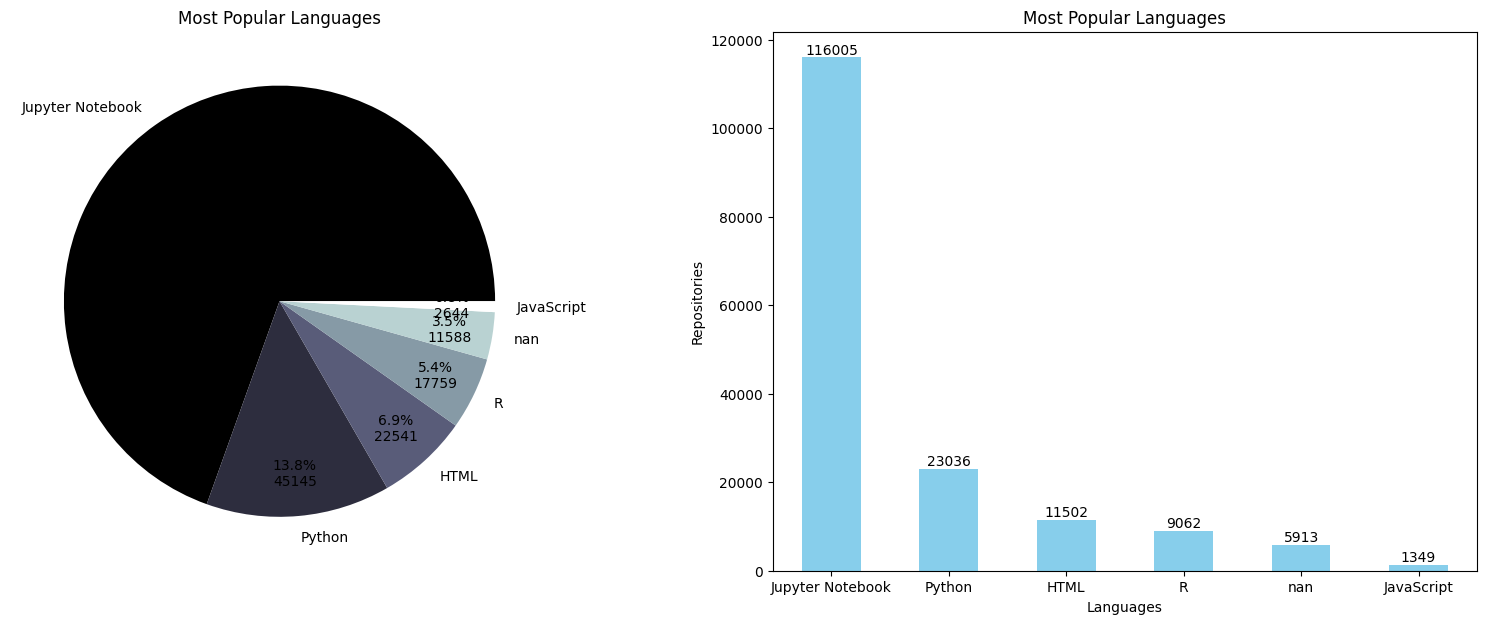

In [8]:
primary_languages = filtered.primary_language\
    .value_counts(dropna=False)\
    .rename_axis('primary_language').to_frame("Repositories")

pl = primary_languages[:5].reset_index(level=0)
others = pd.DataFrame(data = {
    'PrimaryLanguage' : ['Other Languages'],
    'Repositories' : [primary_languages['Repositories'][5:].sum()]
})

pl2 = pd.concat([pl,others]).reset_index(drop=True)\
    .sort_values(by='Repositories', ascending=False)

fig1, ax1 = plt.subplots(ncols=2, figsize=(20,7))
pl2.plot.pie(ax=ax1[0], y="Repositories", title="Most Popular Languages",
             labels=pl2["primary_language"], ylabel='',cmap="bone", pctdistance=0.8,
             autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))) ).get_legend().remove()
pl2.plot.bar(ax=ax1[1], color="skyblue", title="Most Popular Languages",
             xlabel='Languages', ylabel='Repositories',
             ).get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4,5],
           labels=pl2["primary_language"], rotation=0)
ax1[1].bar_label(ax1[1].containers[0], label_type='edge');

#### Number of Languages per Repository

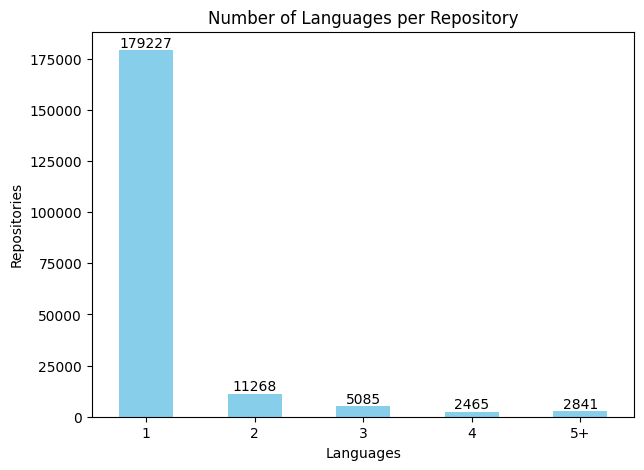

In [19]:
languages = filtered.languages\
    .value_counts(dropna=False, bins = [1,2, 3, 4, 5, 100])\
    .sort_index().to_frame("Repositories")

fig2, ax2 = plt.subplots( figsize=(7,5))
languages.plot.bar(title='Number of Languages per Repository', color='skyblue', ax=ax2,
                   xlabel='Languages', ylabel='Repositories').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2','3', '4', '5+'], rotation=0)
ax2.bar_label(ax2.containers[0], label_type='edge');

### Commits and Contributors

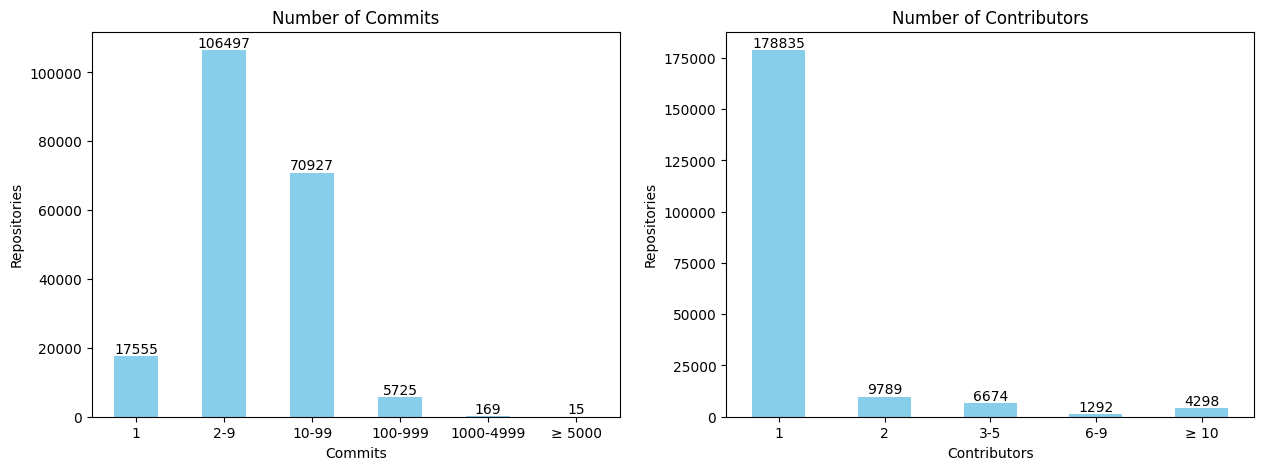

In [20]:
fig3, ax3 = plt.subplots( figsize=(15, 5), ncols=2)

commits = filtered.commits\
    .value_counts(dropna=False, bins = [0, 1,9,99,999, 4999, 100000])\
    .sort_index().to_frame("Repositories")
commits.plot.bar(title='Number of Commits', color='skyblue', ax=ax3[0],
                   xlabel='Commits', ylabel='Repositories').get_legend().remove()

ax3[0].set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1', '2-9', '10-99','100-999', '1000-4999', '≥ 5000'], rotation=0)
ax3[0].bar_label(ax3[0].containers[0], label_type='edge')

contributors = filtered.contributors\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")
contributors.plot.bar(title='Number of Contributors', color='skyblue', ax=ax3[1],
                   xlabel='Contributors', ylabel='Repositories').get_legend().remove()

ax3[1].set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax3[1].bar_label(ax3[1].containers[0], label_type='edge');

### Branchs and Tags

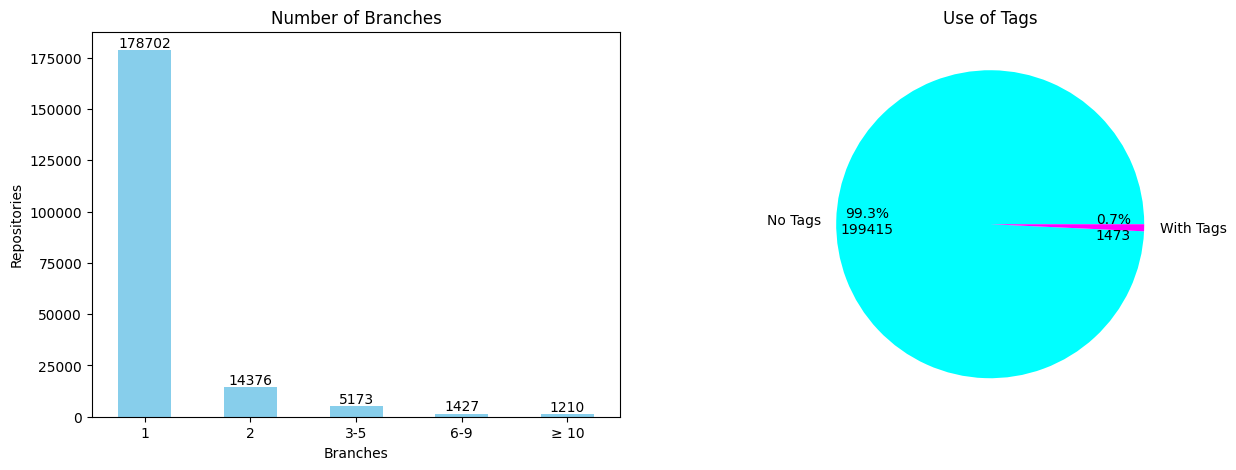

In [21]:
fig4, ax4 = plt.subplots( figsize=(15, 5), ncols=2)

branches = filtered.branches\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")
branches.plot.bar(title='Number of Branches', color='skyblue', ax=ax4[0],
                   xlabel='Branches', ylabel='Repositories').get_legend().remove()

ax4[0].set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax4[0].bar_label(ax4[0].containers[0], label_type='edge')

tags = filtered.tags\
    .value_counts(dropna=False, bins = [-1, 0, 100000])\
    .sort_index().to_frame("Repositories")

tags.plot.pie(ax=ax4[1],y='Repositories', labels=['No Tags', 'With Tags'],
              pctdistance=0.8, ylabel='',
              autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                        .format(prct_value, (len(filtered) * prct_value / 100))),
              cmap="cool").get_legend().remove()
ax4[1].set_title("Use of Tags");state = 'repository_selected'

### Pull Requests and Issues

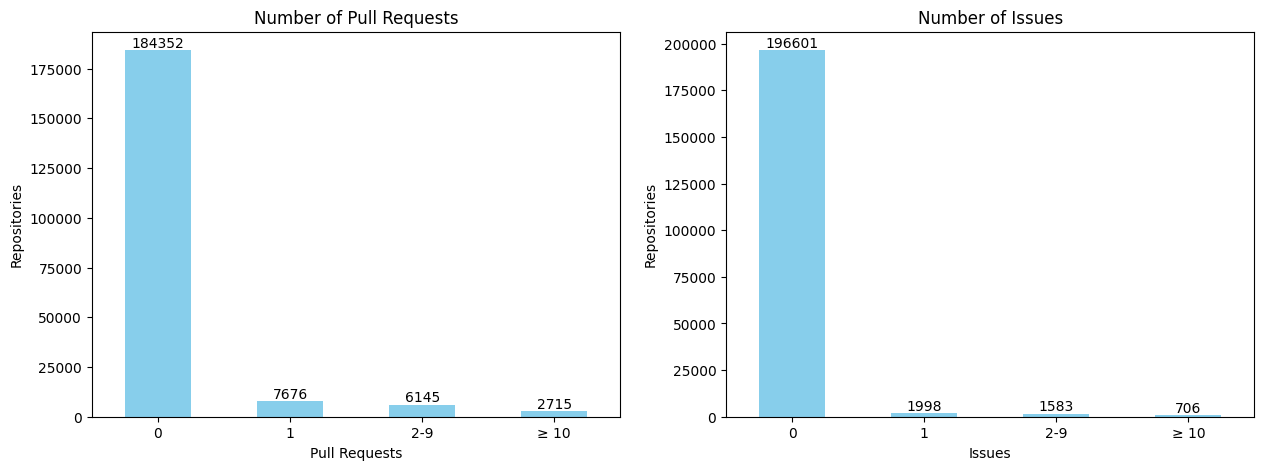

In [22]:
fig5, ax5 = plt.subplots( figsize=(15, 5), ncols=2)

pull_requests = filtered.pull_requests\
    .value_counts(dropna=False, bins = [-1, 0,1, 9, 100000])\
    .sort_index().to_frame("Repositories")
pull_requests.plot.bar(title='Number of Pull Requests', color='skyblue', ax=ax5[0],
                   xlabel='Pull Requests', ylabel='Repositories').get_legend().remove()

ax5[0].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax5[0].bar_label(ax5[0].containers[0], label_type='edge')


issues = filtered.issues\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

issues.plot.bar(title='Number of Issues', color='skyblue', ax=ax5[1],
                   xlabel='Issues', ylabel='Repositories').get_legend().remove()

ax5[1].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax5[1].bar_label(ax5[1].containers[0], label_type='edge');

### Watchers, Forks, Stargazers and Releases

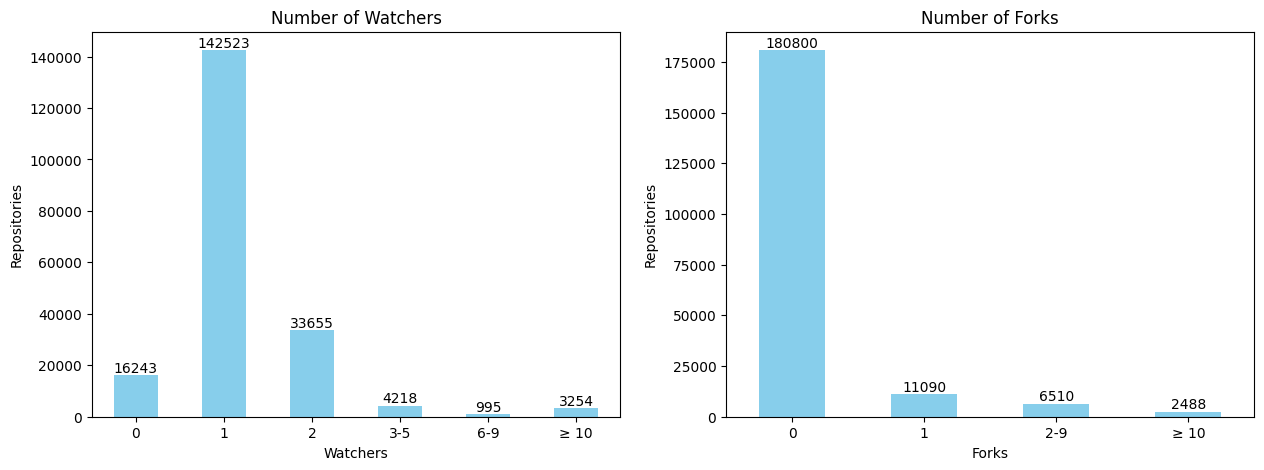

In [23]:
fig6, ax6 = plt.subplots( figsize=(15, 5), ncols=2)


watchers = filtered.watchers\
    .value_counts(dropna=False, bins = [-1, 0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

watchers.plot.bar(title='Number of Watchers', color='skyblue', ax=ax6[0],
                   xlabel='Watchers', ylabel='Repositories').get_legend().remove()

ax6[0].set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2', '3-5', '6-9', '≥ 10'], rotation=0)
ax6[0].bar_label(ax6[0].containers[0], label_type='edge')


forks = filtered.forks\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

forks.plot.bar(title='Number of Forks', color='skyblue', ax=ax6[1],
                   xlabel='Forks', ylabel='Repositories').get_legend().remove()
ax6[1].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax6[1].bar_label(ax6[1].containers[0], label_type='edge');

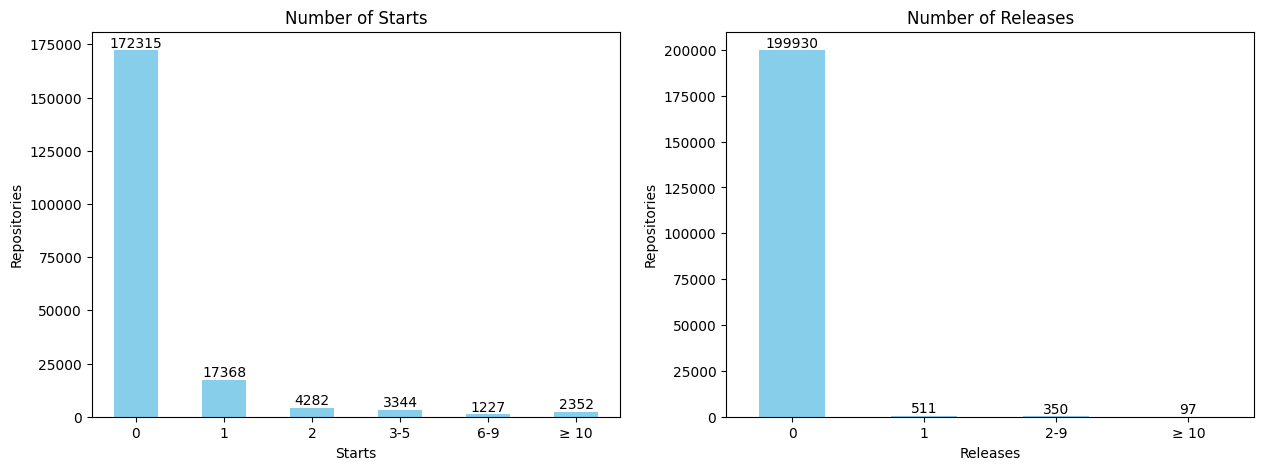

In [24]:
fig7, ax7 = plt.subplots( figsize=(15, 5), ncols=2)

stars = filtered.stargazers\
    .value_counts(dropna=False, bins = [-1, 0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

stars.plot.bar(title='Number of Starts', color='skyblue', ax=ax7[0],
                   xlabel='Starts', ylabel='Repositories').get_legend().remove()

ax7[0].set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax7[0].bar_label(ax7[0].containers[0], label_type='edge')

releases = filtered.releases\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

releases.plot.bar(title='Number of Releases', color='skyblue', ax=ax7[1],
                   xlabel='Releases', ylabel='Repositories').get_legend().remove()

ax7[1].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax7[1].bar_label(ax7[1].containers[0], label_type='edge');

### Disk Usage

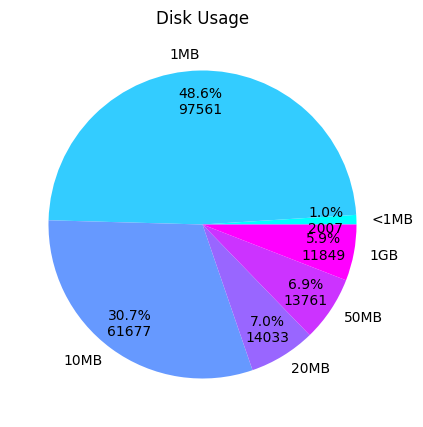

In [25]:
fig8, ax8 = plt.subplots( figsize=(6, 5))

disk_usage = filtered.disk_usage.astype(int)\
    .value_counts(dropna=False, bins = [-1, 0, 10**3, 10*10**3, 20*10**3, 50*10**3,10**6])\
    .sort_index().to_frame("Repositories")
disk_usage.plot.pie(ax=ax8,y='Repositories', labels=['<1MB', '1MB', '10MB', '20MB', '50MB', '1GB'],
              pctdistance=0.8, ylabel='',
              autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                        .format(prct_value, (len(filtered) * prct_value / 100))),
              cmap="cool").get_legend().remove()
ax8.set_title("Disk Usage");

### Repository Creation and Average Duration

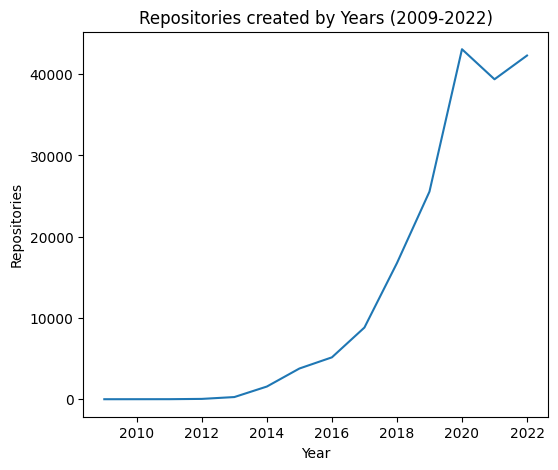

In [26]:
fig9, ax9 = plt.subplots( figsize=(6, 5))

creation = pd.to_datetime(filtered['git_created_at']).dt.year.value_counts(dropna=False)\
    .sort_index().to_frame("Repositories")
creation = creation.drop(index=creation.index[-1])
creation.plot(ax=ax9, y='Repositories').get_legend().remove()

ax9.set_xlabel('Year')
ax9.set_ylabel('Repositories')
ax9.set_title('Repositories created by Years (2009-2022)');

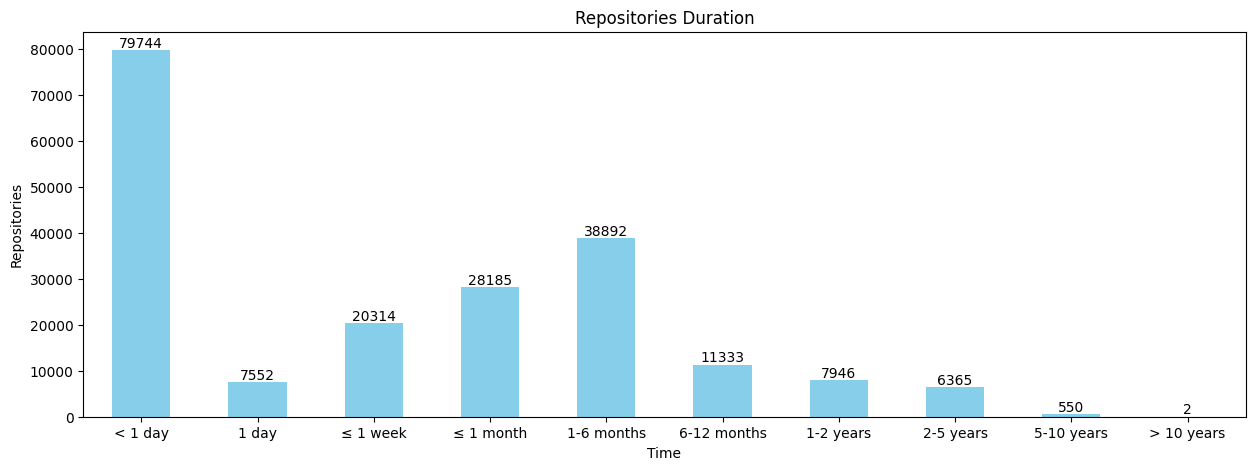

In [27]:
fig10, ax10 = plt.subplots( figsize=(15, 5))
dates = filtered[['repository', 'git_created_at', 'git_pushed_at']]
dates =  dates.dropna(subset=['git_created_at'])
dates =  dates.dropna(subset=['git_pushed_at'])
dates["interval"] =  dates.git_pushed_at - dates.git_created_at
dates["interval_days"] = dates["interval"].dt.days.astype(int).abs()

duration = dates['interval_days'].value_counts(dropna=False, bins = [-1, 0,1,7,30,180, 365, 730, 1825, 3650, 100000])\
    .sort_index().to_frame("Repositories")

duration.plot.bar(ax=ax10, y="Repositories", color="skyblue",
                  xlabel='Time', ylabel='Repositories').get_legend().remove()

ax10.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                labels=['< 1 day', '1 day','≤ 1 week', '≤ 1 month', '1-6 months',
                        '6-12 months','1-2 years', '2-5 years', '5-10 years', '> 10 years'], rotation=0)
ax10.bar_label(ax10.containers[0], label_type='edge')
ax10.set_title('Repositories Duration');